In [ ]:
#한글깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from konlpy.tag import Okt
import pandas as pd
from collections import Counter
import numpy as np
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import *
#한글깨짐
font_fname=plt.rc('font',family='NanumBarunGothic')
from matplotlib import font_manager
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv("/content/drive/MyDrive/cp2/emotion.csv")
df

,index,age,sex,emotion,Q,A
0,0,청년,여성,기쁨,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?
1,1,청년,여성,기쁨,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?
2,2,중년,여성,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?
3,3,노년,남성,슬픔,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.
4,4,노년,남성,슬픔,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.
...,...,...,...,...,...,...
199355,224558,청년,여성,슬픔,일단 좀 쉬어야 할 것 같아. 남자 친구와의 추억도 정리하고 마음도 정리해야겠어.,짐 정리도 하시고 마음 정리도 하시면서 슬픈 감정이 해소되길 바라요.
199356,224559,중년,여성,슬픔,나는 아들이 엄청나게 좋아할 거라 기대했는데 실망스러워.,아들의 반응 때문에 실망이 크시겠어요.
199357,224560,중년,여성,분노,먼저 업무 인계서부터 천천히 작성 해야지.,은퇴에 정리할 일이 많아 힘드시겠지만 잘 마무리하셨으면 좋겠어요.
199358,224561,청년,남성,기쁨,기분이 좋아. 나도 일 때문에 바쁠 때는 미리 얘기하기로 했어.,앞으로의 갈등을 해결할 방법을 미리 강구해 놓으셨네요.


## **형태소 분석**

In [5]:
def okt(df,e,a,n):
    okt=Okt()
    df_feature=df[df[e]==a]
    words="".join(df_feature['Q'].tolist())
    words_okt=okt.morphs(words,stem=True)
    remove_one_word = [x for x in words_okt if len(x)>1 ] #한글자 제외
    with open('/content/drive/MyDrive/cp2/stopwords1.txt','r') as f: #불용어 불러오기
        list_file =f.readlines()
    stopwords = []
    for i in list_file:
        stopwords.append(i.replace('\n',''))
    remove_stopwords=[x for x in remove_one_word if x not in stopwords] #불용어 제거 
    words_list=Counter(remove_stopwords).most_common(n) #빈도수 높은순으로 n개 불러오기 
    words_dit={words_list[i][0]:words_list[i][1] for i in range(len(words_list))} #딕서녀리로 저장
    
    return words_dit 

In [12]:
#전체 Top20
okt1=Okt()
words1="".join(df['Q'].tolist())
words_okt1=okt1.morphs(words1,stem=True)
remove_one_word1 = [x for x in words_okt1 if len(x)>1 ] #한글자 제외
with open('/content/drive/MyDrive/cp2/stopwords1.txt','r') as f1: #불용어 불러오기
    list_file1 =f1.readlines()
stopwords1 = []
for i in list_file1:
    stopwords1.append(i.replace('\n',''))
remove_stopwords1=[x for x in remove_one_word1 if x not in stopwords1] #불용어 제거 
words_list1=Counter(remove_stopwords1).most_common(20) #빈도수 높은순으로 n개 불러오기 
# words_dit={words_list[i][0]:words_list[i][1] for i in range(len(words_list))}

In [125]:
def bar(dit_words,title):
  myList = sorted(dit_words.items(), key=lambda x: x[1]) #딕서너리 내림차순 정리 
  x, y = zip(*myList)

  plt.figure(figsize=(10,10))
  bar = plt.barh(x,y, color='g',alpha=0.6)
  
  plt.title(title)

  #그래프위 레이블
  for rect in bar:
    width = rect.get_width()
    plt.text(width, rect.get_y() + rect.get_height()/4, '%s' % width, ha='center', va='bottom', size = 12)

  plt.grid()
  plt.show()


In [66]:
#딕셔너리로 변환
words_dit1={words_list1[i][0]:words_list1[i][1] for i in range(len(words_list1))}

In [91]:
#전체 문장에서 가장 많이 쓰이는 어휘 20개
words_dit1

{'너무': 24387,
 '친구': 23005,
 '보다': 19551,
 '없다': 19368,
 '않다': 16124,
 '좋다': 15583,
 '생각': 12382,
 '사람': 11575,
 '싶다': 10862,
 '들다': 10348,
 '받다': 10052,
 '모르다': 10004,
 '자다': 9430,
 '많이': 7580,
 '가다': 7576,
 '정말': 7357,
 '아니다': 7039,
 '걱정': 6684,
 '회사': 6673,
 '힘들다': 6198}

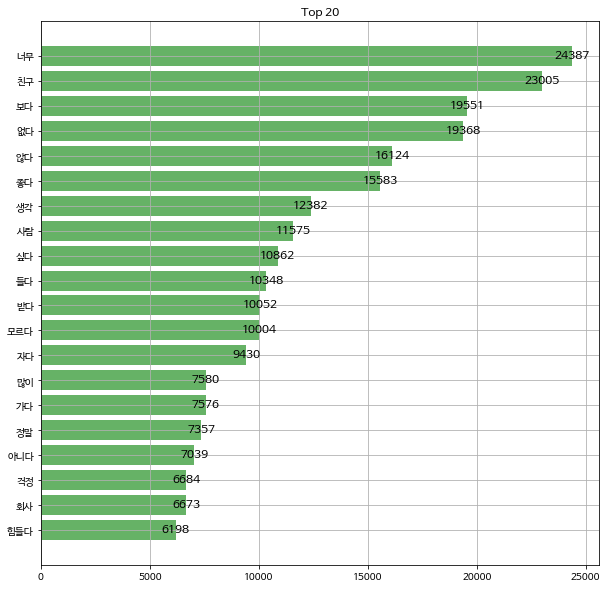

In [126]:
bar(words_dit1,'Top 20')

### **성별 & 연령 분석**
- 성별에 따라서는 특별한 특징이 나타나지 않는다.
- 청소년과 청년은 긍정적인 단어를 더 많이 쓰고, 중년과 노년은 부정적인 단어를 더 많이 쓴다. 따라서 청소년과 청년에게 상담시 긍정적이고 밝은 답변을 하고, 중년과 노년에게는 위로의 표현을 좀 더 많이 답변 할 수 있도록 하는 것이 좋다고 생각한다. 


In [177]:
def pie( dit,title, explode):
  #상위 5개만 나타나기 위해서 5가지만 불러오기
  dit_5 = {}
  cnt = 0
  for k, v in dit.items():
    if cnt < 5:
      dit_5 .update({k:v})
      cnt += 1

  myList = dit_5.items()
  labels,ratio = zip(*myList)

  #파이그래프 그리기
  plt.figure(figsize=(7,7))
  explode =explode
  colors = ['gold', 'silver', 'cyan', 'white', 'pink']
  wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1 ,'edgecolor': 'black'}
  plt.pie(ratio, labels=labels, autopct='%.1f%%', colors = colors, counterclock=False,  wedgeprops=wedgeprops,shadow = True,explode = explode)
  plt.legend(loc = (1, 0.5))
  plt.title(title)
  plt.show()

In [27]:
#남성이 많이 쓰는 단어 Top 20
mal_words=okt(df,'sex','남성',20)
mal_words

{'친구': 9780,
 '너무': 9574,
 '보다': 8266,
 '없다': 8234,
 '않다': 6833,
 '좋다': 6492,
 '생각': 4998,
 '아내': 4621,
 '사람': 4384,
 '받다': 4349,
 '모르다': 4047,
 '들다': 3992,
 '싶다': 3918,
 '자다': 3800,
 '많이': 3296,
 '가다': 3250,
 '회사': 3009,
 '아니다': 2912,
 '정말': 2903,
 '걱정': 2876}

In [28]:
#여성이 많이 쓰는 단어 Top 20
femal_words=okt(df,'sex','여성',20)
femal_words

{'너무': 14812,
 '친구': 13226,
 '보다': 11284,
 '없다': 11135,
 '않다': 9291,
 '좋다': 9091,
 '생각': 7385,
 '사람': 7191,
 '싶다': 6944,
 '들다': 6360,
 '모르다': 5957,
 '받다': 5703,
 '자다': 5637,
 '남편': 4973,
 '정말': 4454,
 '가다': 4329,
 '많이': 4283,
 '아니다': 4120,
 '걱정': 3808,
 '힘들다': 3695}

In [29]:
#청소년 많이 쓰는 단어
teenager_words=okt(df,'age','청소년',20)
teenager_words

{'친구': 6766,
 '너무': 5086,
 '보다': 3582,
 '좋다': 2924,
 '않다': 2858,
 '엄마': 2776,
 '없다': 2744,
 '공부': 2639,
 '싶다': 2480,
 '부모님': 2453,
 '학교': 2402,
 '모르다': 2046,
 '선생님': 2027,
 '나르다': 1889,
 '자다': 1871,
 '생각': 1838,
 '성적': 1765,
 '받다': 1671,
 '가다': 1621,
 '아빠': 1591}

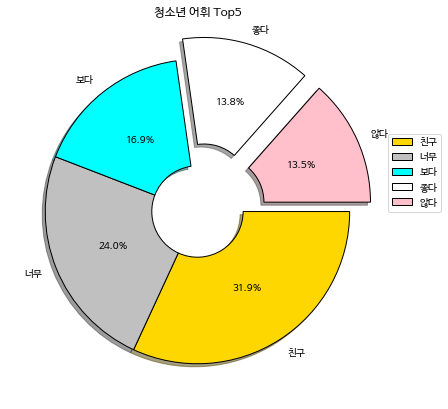

In [178]:
pie(teenager_words, "청소년 어휘 Top5", [0,0,0,0.15,0.15])

In [30]:
#청년 단어 Top10
youth_words=okt(df,'age','청년',20)
youth_words

{'친구': 9092,
 '너무': 7962,
 '보다': 5924,
 '사람': 5002,
 '좋다': 4944,
 '없다': 4854,
 '않다': 4795,
 '결혼': 4116,
 '생각': 4049,
 '싶다': 3717,
 '회사': 3344,
 '모르다': 3205,
 '자다': 3083,
 '들다': 3019,
 '정말': 2803,
 '취업': 2679,
 '받다': 2533,
 '아니다': 2327,
 '직장': 2192,
 '마음': 2136}

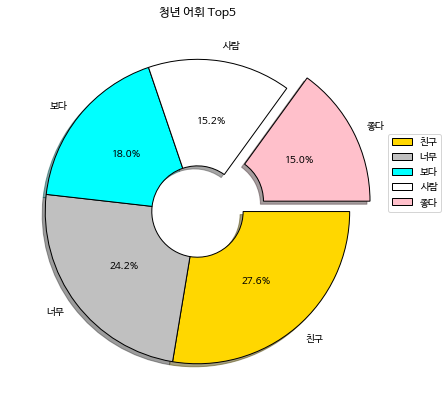

In [179]:
pie(youth_words, "청년 어휘 Top5", [0,0,0,0,0.15])

In [31]:
#중년 단어 Top10
middle_words=okt(df,'age','중년',20)
middle_words

{'너무': 6427,
 '없다': 5681,
 '보다': 5541,
 '않다': 4533,
 '좋다': 4133,
 '생각': 3575,
 '받다': 3144,
 '들다': 3002,
 '남편': 2962,
 '회사': 2946,
 '모르다': 2731,
 '걱정': 2601,
 '싶다': 2526,
 '자다': 2502,
 '많이': 2444,
 '준비': 2389,
 '건강': 2365,
 '노후': 2361,
 '친구': 2322,
 '요즘': 2221}

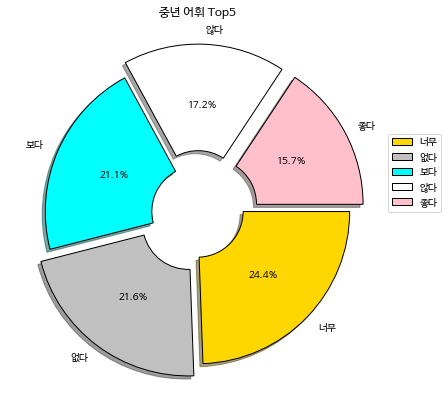

In [181]:
pie(middle_words, "중년 어휘 Top5", [0,0.1,0,0.1,0.1])

In [32]:
#노년 단어 Top10
old_words=okt(df,'age','노년',20)
old_words

{'없다': 6089,
 '너무': 4911,
 '친구': 4829,
 '보다': 4504,
 '않다': 3938,
 '사람': 3728,
 '좋다': 3582,
 '생각': 2920,
 '들다': 2916,
 '받다': 2704,
 '나이': 2434,
 '아프다': 2324,
 '자식': 2303,
 '병원': 2294,
 '건강': 2187,
 '싶다': 2139,
 '가다': 2077,
 '많이': 2029,
 '모르다': 2022,
 '자다': 1978}

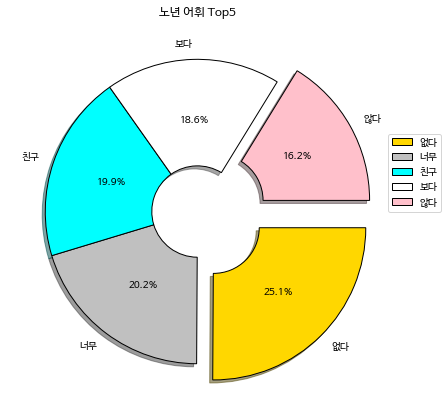

In [182]:
pie(old_words, "노년 어휘 Top5", [0.15,0,0,0,0.15])

In [33]:
#성별 데이터 프레임
df_female=df[df['sex']=='여성']
df_male=df[df['sex']=='남성']

In [34]:
#청소년 여자
f_teenager_words=okt(df_female,'age','청소년',20)
f_teenager_words

{'친구': 3748,
 '너무': 2974,
 '보다': 2061,
 '엄마': 1813,
 '좋다': 1665,
 '않다': 1632,
 '싶다': 1613,
 '없다': 1538,
 '공부': 1519,
 '부모님': 1423,
 '학교': 1366,
 '모르다': 1152,
 '자다': 1106,
 '선생님': 1072,
 '생각': 1064,
 '나르다': 1004,
 '성적': 991,
 '가다': 960,
 '받다': 933,
 '아빠': 909}

In [183]:
#청소년 남자 
M_teenager_words=okt(df_male,'age','청소년',20)
M_teenager_words


{'친구': 3018,
 '너무': 2112,
 '보다': 1520,
 '좋다': 1259,
 '않다': 1226,
 '없다': 1206,
 '공부': 1121,
 '학교': 1036,
 '부모님': 1030,
 '엄마': 964,
 '선생님': 955,
 '모르다': 894,
 '나르다': 887,
 '싶다': 867,
 '생각': 774,
 '성적': 773,
 '자다': 765,
 '받다': 738,
 '당하다': 703,
 '아빠': 682}

In [36]:
F_youth_words=okt(df_female,'age','청년',20)
F_youth_words

{'친구': 5797,
 '너무': 5172,
 '보다': 3631,
 '사람': 3165,
 '좋다': 3106,
 '없다': 3065,
 '않다': 2969,
 '결혼': 2800,
 '생각': 2609,
 '싶다': 2501,
 '모르다': 2069,
 '회사': 2031,
 '들다': 1943,
 '자다': 1934,
 '남자친구': 1933,
 '정말': 1778,
 '취업': 1707,
 '받다': 1630,
 '아니다': 1483,
 '직장': 1442}

In [37]:
M_youth_words=okt(df_male,'age','청년',20)
M_youth_words

{'친구': 3295,
 '너무': 2790,
 '보다': 2293,
 '사람': 1837,
 '좋다': 1837,
 '않다': 1826,
 '없다': 1788,
 '생각': 1441,
 '결혼': 1316,
 '회사': 1312,
 '싶다': 1216,
 '자다': 1149,
 '모르다': 1136,
 '들다': 1077,
 '정말': 1025,
 '여자친구': 1020,
 '아내': 990,
 '취업': 972,
 '받다': 903,
 '아니다': 839}

In [38]:
F_middle_words=okt(df_female,'age','중년',20)
F_middle_words

{'너무': 3737,
 '없다': 3243,
 '보다': 3104,
 '남편': 2905,
 '않다': 2475,
 '좋다': 2287,
 '생각': 2099,
 '들다': 1814,
 '받다': 1759,
 '싶다': 1571,
 '모르다': 1569,
 '자다': 1502,
 '회사': 1469,
 '걱정': 1413,
 '사람': 1375,
 '요즘': 1361,
 '준비': 1333,
 '건강': 1285,
 '친구': 1280,
 '아니다': 1275}

In [39]:
M_middle_words=okt(df_male,'age','중년',20)
M_middle_words

{'너무': 2690,
 '없다': 2438,
 '보다': 2437,
 '않다': 2058,
 '아내': 1936,
 '좋다': 1845,
 '회사': 1477,
 '생각': 1476,
 '받다': 1385,
 '들다': 1190,
 '걱정': 1188,
 '많이': 1187,
 '모르다': 1162,
 '노후': 1103,
 '건강': 1080,
 '준비': 1057,
 '친구': 1042,
 '자다': 1000,
 '아들': 956,
 '싶다': 954}

In [40]:
F_old_words=okt(df_female,'age','노년',20)
F_old_words

{'없다': 3289,
 '너무': 2929,
 '보다': 2490,
 '친구': 2402,
 '사람': 2279,
 '않다': 2215,
 '좋다': 2032,
 '들다': 1762,
 '생각': 1613,
 '나이': 1477,
 '자식': 1391,
 '받다': 1381,
 '싶다': 1258,
 '건강': 1251,
 '아프다': 1227,
 '병원': 1172,
 '모르다': 1167,
 '남편': 1141,
 '많이': 1137,
 '자다': 1093}

In [184]:
M_old_words=okt(df_male,'age','노년',20)
M_old_words

{'없다': 2801,
 '친구': 2427,
 '보다': 2015,
 '너무': 1982,
 '않다': 1723,
 '아내': 1701,
 '좋다': 1551,
 '사람': 1449,
 '받다': 1323,
 '생각': 1307,
 '들다': 1154,
 '병원': 1122,
 '아프다': 1097,
 '가다': 985,
 '나이': 958,
 '건강': 936,
 '자식': 912,
 '많이': 892,
 '자다': 885,
 '싶다': 881}

## **wordcloud**

In [10]:
def wordcloud(words_dit,color_back,color_map):
  cand_mask=np.array(Image.open('/content/drive/MyDrive/cp2/circle.png')) #내가 만들고 형태의 이미지 불러오기 
  wordcloud = WordCloud(
      font_path = font_family, # 한글 글씨체 설정
      background_color=color_back, # 배경색
      colormap= color_map, # 글씨색
      mask= cand_mask # 워드클라우드 모양 설정
      ).generate_from_frequencies(words_dit)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off') # 차트로 나오지 않게

### **감정별 분석**
-기쁨일때는 부정의 단어가 보이긴 하지만 긍정의 단어들을 더 많이 사용되는 것이 보인다.

-슬픔에서 특히나 부정적인 단어들을 많이 사용한다. 

In [8]:
#행복
h=okt(df,'emotion','기쁨',100)

In [193]:
h

{'좋다': 4783,
 '너무': 3483,
 '친구': 3324,
 '자다': 2472,
 '보다': 2367,
 '정말': 2215,
 '않다': 1928,
 '싶다': 1926,
 '기쁘다': 1903,
 '없다': 1901,
 '생각': 1840,
 '받다': 1723,
 '많이': 1698,
 '사람': 1588,
 '오늘': 1558,
 '마음': 1453,
 '가다': 1369,
 '들다': 1318,
 '걱정': 1308,
 '이제': 1276,
 '기분': 1168,
 '맞다': 1133,
 '다행': 1109,
 '회사': 1061,
 '많다': 1050,
 '아내': 1010,
 '주다': 1010,
 '열심히': 1010,
 '고맙다': 989,
 '가족': 976,
 '준비': 923,
 '지금': 903,
 '감사하다': 884,
 '먹다': 874,
 '건강': 851,
 '요즘': 840,
 '행복하다': 816,
 '오다': 816,
 '나르다': 789,
 '나오다': 788,
 '건강하다': 750,
 '결혼': 738,
 '일이': 729,
 '운동': 714,
 '아니다': 713,
 '남편': 709,
 '믿다': 707,
 '편안하다': 686,
 '드디어': 671,
 '힘들다': 668,
 '편하다': 657,
 '좋아하다': 647,
 '모르다': 631,
 '아들': 622,
 '부모님': 614,
 '노후': 608,
 '만나다': 602,
 '나이': 589,
 '생기다': 583,
 '직장': 569,
 '다니다': 569,
 '공부': 561,
 '병원': 555,
 '학교': 554,
 '선생님': 542,
 '크다': 541,
 '알다': 538,
 '선물': 526,
 '엄마': 520,
 '여행': 515,
 '노력': 485,
 '아주': 484,
 '살다': 483,
 '항상': 478,
 '은퇴': 477,
 '취업': 448,
 '아프다': 448,
 '시험': 445,
 '차다': 445

In [216]:
def dataframe(h1,h2):

  x,y=zip(*h1.items())
  a={h2:x,'횟수':y}
  df_h=pd.DataFrame(a)
  return df_h.head(20)


In [217]:
dataframe(h,'기쁨')

,기쁨,횟수
0,좋다,4783
1,너무,3483
2,친구,3324
3,자다,2472
4,보다,2367
5,정말,2215
6,않다,1928
7,싶다,1926
8,기쁘다,1903
9,없다,1901


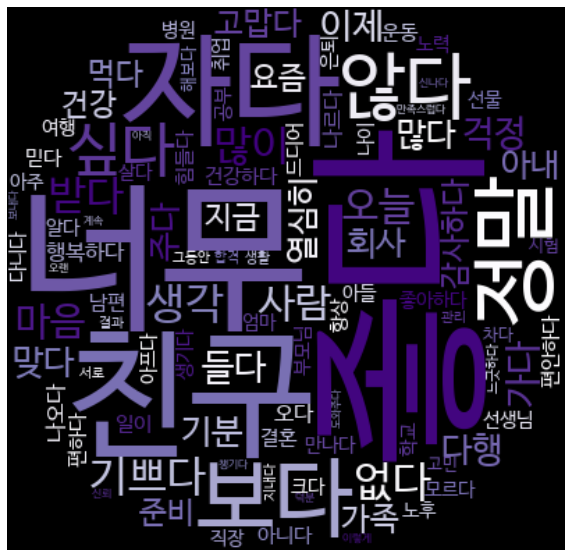

In [11]:
wordcloud(h,'black','Purples')

In [220]:
#슬픔 
s=okt(df,'emotion','슬픔',100)

In [221]:
dataframe(s,'슬픔')

,슬픔,횟수
0,너무,4693
1,없다,3958
2,친구,3737
3,보다,3294
4,않다,3112
5,생각,2612
6,슬프다,2359
7,싶다,2099
8,좋다,2095
9,사람,1887


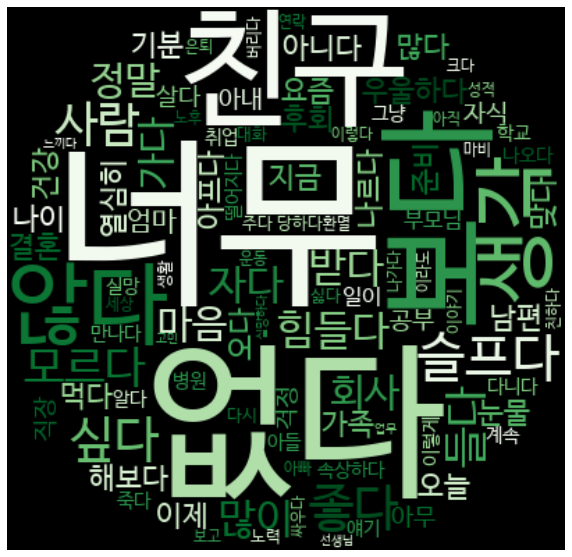

In [222]:
wordcloud(s,'black','Greens')

In [223]:
a=okt(df,'emotion','분노',100)

In [224]:
dataframe(a,'분노')

,분노,횟수
0,너무,4330
1,친구,3360
2,없다,3159
3,않다,2934
4,보다,2902
5,화가,2348
6,좋다,2272
7,싶다,1883
8,사람,1876
9,모르다,1837


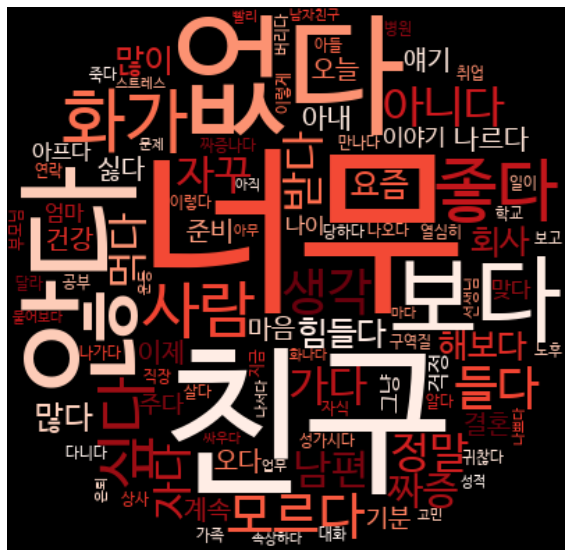

In [225]:
wordcloud(a,'black','Reds')

In [226]:
#당황
e=okt(df,'emotion','당황',100)

In [227]:
dataframe(e,'당황')

,당황,횟수
0,친구,4117
1,너무,3863
2,보다,3428
3,없다,3148
4,않다,2373
5,사람,2219
6,생각,1967
7,들다,1930
8,좋다,1894
9,모르다,1858


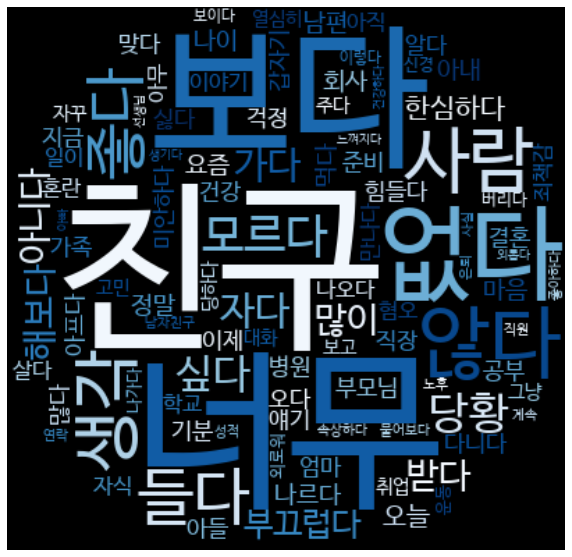

In [228]:
wordcloud(e,'black','Blues')